In [1]:
# standard imports

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys, os

# Add Some Useful Classes to the System Path

In [2]:
print("\nSYSTEM PATH BEFORE\n", sys.path)
path_extend = os.path.abspath('/home/kurt/work/utils')
if path_extend not in sys.path:
    sys.path.insert(0, path_extend)
print("\nSYSTEM PATH AFTER\n", sys.path)

# import
import classes

# instantiate
util = classes.util()
util.getCwd()


SYSTEM PATH BEFORE
 ['/home/kurt/work/gps-satellites/jupyter', '/home/kurt/anaconda3/lib/python38.zip', '/home/kurt/anaconda3/lib/python3.8', '/home/kurt/anaconda3/lib/python3.8/lib-dynload', '', '/home/kurt/anaconda3/lib/python3.8/site-packages', '/home/kurt/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/home/kurt/.ipython']

SYSTEM PATH AFTER
 ['/home/kurt/work/utils', '/home/kurt/work/gps-satellites/jupyter', '/home/kurt/anaconda3/lib/python38.zip', '/home/kurt/anaconda3/lib/python3.8', '/home/kurt/anaconda3/lib/python3.8/lib-dynload', '', '/home/kurt/anaconda3/lib/python3.8/site-packages', '/home/kurt/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/home/kurt/.ipython']

Current Working Directory is /home/kurt/work/gps-satellites/jupyter


# Useful Functions

In [3]:
linestyles = ['-', '--', '-.', ':', ':o']

def remove_spaces(colname):
    return colname.strip().replace(' ','_')

def plotReset():
    plt.clf # clear figure
    plt.cla # clear axes
    plt.figure(figsize=(15,15)) # this also clears the previous plot
    
def plotScatter(xColumn, yColumn, df_, color=None):
    if False: plt.scatter(env[xColumn], env[yColumn], alpha=1.0, zorder=2)
    if False: plt.plot(env[xColumn], env[yColumn], linestyle='dotted', alpha=0.8, zorder=1)
    plt.plot(df_[xColumn], df_[yColumn], 'o', alpha=1.0, color=color)

def plotFormats(title, xLabel, yLabel, legend, 
                xLim = (None,None), 
                yLim = (None,None),
                xTicks = (None,None,None), 
                yTicks = (None,None,None)):
    plt.xlabel(xLabel, fontsize=15, color='darkblue')
    plt.ylabel(yLabel, fontsize=15, color='darkblue')
    plt.xlim(xLim[0], xLim[1])
    plt.ylim(yLim[0], yLim[1])
    plt.title(title, fontsize=15, color='darkblue');
    plt.grid(True)
    plt.legend(legend[0], loc=legend[1])
    plt.xticks(fontsize=14, rotation=45)
    plt.yticks(fontsize=14, rotation=45)
    if xTicks[0] != None:
        plt.xticks(np.arange(xTicks[0], xTicks[1], step=xTicks[2]))
    if yTicks[0] != None:
        plt.yticks(np.arange(yTicks[0], yTicks[1], step=yTicks[2]))
    return


<br>

# GPS Satellites

<p style="font-size:120%; font-family: Consolas, monaco, monospace;">
There are currently 30 satellites in the GPS constellation contained in 6 orbital planes. Each GPS satellite orbits twice per 24 hour day around the earth. The goal of the GPS constellation is to make sure that at least 4 GPS satellites are covering every point on the earth at any one time. There also exist much space debris (for various reasons) orbiting the earth. For example, a large pattern of space debris was created in 2007 when the Chinese intentionally destroyed its own satellite. The locations of satellites and space debris are mostly public information. This project proposes to monitor GPS satellite locations and their positions in space relative to space debris, including the Chinese anti-satellite missile test debris. The goal of this project is to determine how close space debris might come to our essential GPS fleet.<br>
<br>
The GPS satellite data is presented in CSV format by the URL<br>
&nbsp;&nbsp;https://celestrak.com/NORAD/elements/gp.php?GROUP=GPS-OPS&FORMAT=CSV<br>
<br>
It can be copied and pasted into an empty .csv file<br><br>
Similarly, the Chinese debris is available at<br>
&nbsp;&nbsp;https://celestrak.com/NORAD/elements/gp.php?CATNR=25544&FORMAT=CSV<br>
</p>


# Open a CSV File Containing GPS Data

In [4]:
sat = pd.read_csv('data/gps-2021-02-07.csv')
sat.rename(columns = remove_spaces, inplace=True)

if True: print("Index is:", sat.index,
               "Columns are:", sat.columns,
               "Values are:", sat.values[0:3], sep='\n\n')
sat.iloc[:,:]

Index is:

RangeIndex(start=0, stop=30, step=1)

Columns are:

Index(['OBJECT_NAME', 'OBJECT_ID', 'EPOCH', 'MEAN_MOTION', 'ECCENTRICITY',
       'INCLINATION', 'RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', 'MEAN_ANOMALY',
       'EPHEMERIS_TYPE', 'CLASSIFICATION_TYPE', 'NORAD_CAT_ID',
       'ELEMENT_SET_NO', 'REV_AT_EPOCH', 'BSTAR', 'MEAN_MOTION_DOT',
       'MEAN_MOTION_DDOT'],
      dtype='object')

Values are:

[['GPS BIIR-2  (PRN 13)' '1997-035A' '2021-02-06T18:32:33.506592'
  2.00562371 0.0047273 55.4664 175.009 57.6323 302.7876 0 'U' 24876 999
  17271 0 1.9e-07 0]
 ['GPS BIIR-4  (PRN 20)' '2000-025A' '2021-02-06T19:39:13.150080'
  2.00563369 0.0058084 53.6796 99.4209 165.3767 209.7166 0 'U' 26360 999
  15203 0 -4.8e-07 0]
 ['GPS BIIR-5  (PRN 28)' '2000-040A' '2021-02-06T20:44:51.004608'
  2.00564309 0.0182067 55.8179 292.9099 282.365 86.5871 0 'U' 26407 999
  15071 0 -1.4e-07 0]]


,OBJECT_NAME,OBJECT_ID,EPOCH,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,CLASSIFICATION_TYPE,NORAD_CAT_ID,ELEMENT_SET_NO,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,MEAN_MOTION_DDOT
0,GPS BIIR-2 (PRN 13),1997-035A,2021-02-06T18:32:33.506592,2.005624,0.004727,55.4664,175.0090,57.6323,302.7876,0,U,24876,999,17271,0,1.900000e-07,0
1,GPS BIIR-4 (PRN 20),2000-025A,2021-02-06T19:39:13.150080,2.005634,0.005808,53.6796,99.4209,165.3767,209.7166,0,U,26360,999,15203,0,-4.800000e-07,0
2,GPS BIIR-5 (PRN 28),2000-040A,2021-02-06T20:44:51.004608,2.005643,0.018207,55.8179,292.9099,282.3650,86.5871,0,U,26407,999,15071,0,-1.400000e-07,0
3,GPS BIIR-8 (PRN 16),2003-005A,2021-02-06T10:01:02.986752,2.005670,0.012000,55.8709,292.7221,36.3344,135.2221,0,U,27663,999,13206,0,-1.600000e-07,0
4,GPS BIIR-9 (PRN 21),2003-010A,2021-02-06T14:16:14.843136,2.005577,0.024432,54.7808,43.4450,291.2396,222.5173,0,U,27704,999,13086,0,-5.100000e-07,0
5,GPS BIIR-10 (PRN 22),2003-058A,2021-02-06T11:10:52.965120,2.005703,0.007144,53.4894,102.1064,299.4188,59.9217,0,U,28129,999,12554,0,-4.800000e-07,0
6,GPS BIIR-11 (PRN 19),2004-009A,2021-02-05T17:02:42.563904,2.005705,0.008781,56.2275,353.5956,102.0513,73.2824,0,U,28190,999,12368,0,-8.300000e-07,0
7,GPS BIIR-13 (PRN 02),2004-045A,2021-02-06T19:45:56.918016,2.005712,0.020581,55.1188,43.3911,271.1481,264.0244,0,U,28474,999,11919,0,-5.000000e-07,0
8,GPS BIIRM-1 (PRN 17),2005-038A,2021-02-06T16:26:09.097728,2.005791,0.013778,56.3172,350.9631,269.3696,270.4544,0,U,28874,999,11259,0,-9.000000e-07,0
9,GPS BIIRM-2 (PRN 31),2006-042A,2021-02-06T13:26:44.952864,2.005560,0.009934,54.8005,229.0250,12.6465,357.6571,0,U,29486,999,10518,0,9.500000e-07,0


# Adjust, Select and Sort the Columns

In [5]:
# extract date/time into new column
# extract object name into new prn column
sat1 = sat.assign(
    date_time = lambda this : this.EPOCH.str[0:16].str.replace("T", " "))

sat1["PRN"] = (sat1["OBJECT_NAME"].str.replace(".*PRN", "PRN", regex=True)
                                  .str.replace("\).*", "", regex=True)) 
    
# select the columns of interest
sat1 = sat1.loc[:, ['date_time', 'OBJECT_NAME', 'PRN', 'ARG_OF_PERICENTER', 'RA_OF_ASC_NODE']]

# sort the columns by date and time
sat1.sort_values(by=['date_time'], ascending=True, inplace=True)

print(sat1)

           date_time           OBJECT_NAME     PRN  ARG_OF_PERICENTER  \
22  2021-02-04 00:11  GPS BIIF-8  (PRN 03)  PRN 03            46.5899   
21  2021-02-04 15:06  GPS BIIF-7  (PRN 09)  PRN 09           105.2890   
6   2021-02-05 17:02  GPS BIIR-11 (PRN 19)  PRN 19           102.0513   
11  2021-02-05 19:24  GPS BIIRM-4 (PRN 15)  PRN 15            54.7692   
26  2021-02-05 22:32  GPS BIIF-12 (PRN 32)  PRN 32           222.1814   
10  2021-02-05 23:45  GPS BIIRM-3 (PRN 12)  PRN 12            66.8796   
20  2021-02-06 00:53  GPS BIIF-6  (PRN 06)  PRN 06           295.1683   
23  2021-02-06 03:18  GPS BIIF-9  (PRN 26)  PRN 26            13.0244   
13  2021-02-06 05:08  GPS BIIRM-6 (PRN 07)  PRN 07           225.7628   
18  2021-02-06 06:13  GPS BIIF-4  (PRN 27)  PRN 27            31.5852   
12  2021-02-06 06:24  GPS BIIRM-5 (PRN 29)  PRN 29           129.6450   
14  2021-02-06 06:49  GPS BIIRM-8 (PRN 05)  PRN 05            49.2565   
15  2021-02-06 06:52  GPS BIIF-1  (PRN 25)  PRN 25 

In [6]:
sat1.describe()

,ARG_OF_PERICENTER,RA_OF_ASC_NODE
count,30.000000,30.000000
mean,148.837883,193.649560
std,105.055257,107.159362
min,12.646500,43.391100
25%,50.200250,105.699425
50%,137.857750,172.233000
75%,224.867450,290.626025
max,355.843700,353.595600


# GPS Satellite Constellation Identified by the Pseudorandom Noise Code

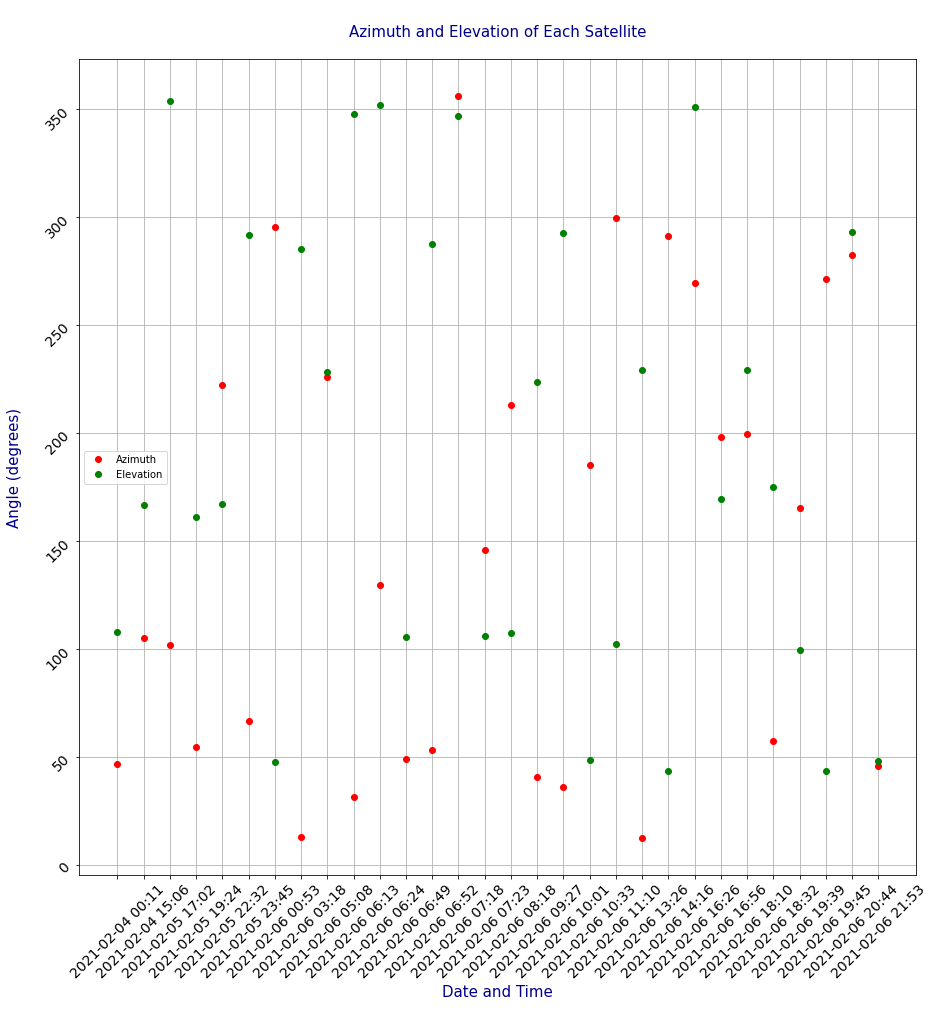

In [7]:
query = sat1.loc[:,:]

title = "\nAzimuth and Elevation of Each Satellite\n"
xLabel = "Date and Time\n"
yLabel = "Angle (degrees)\n"
legend = (['Azimuth', 'Elevation'], 'center left')

plotReset()
plotScatter('date_time', 'ARG_OF_PERICENTER', query, color='Red')
plotScatter('date_time', 'RA_OF_ASC_NODE', query, color='Green')
plotFormats(title, xLabel, yLabel, legend, xTicks = (None,None,None))
plt.show()

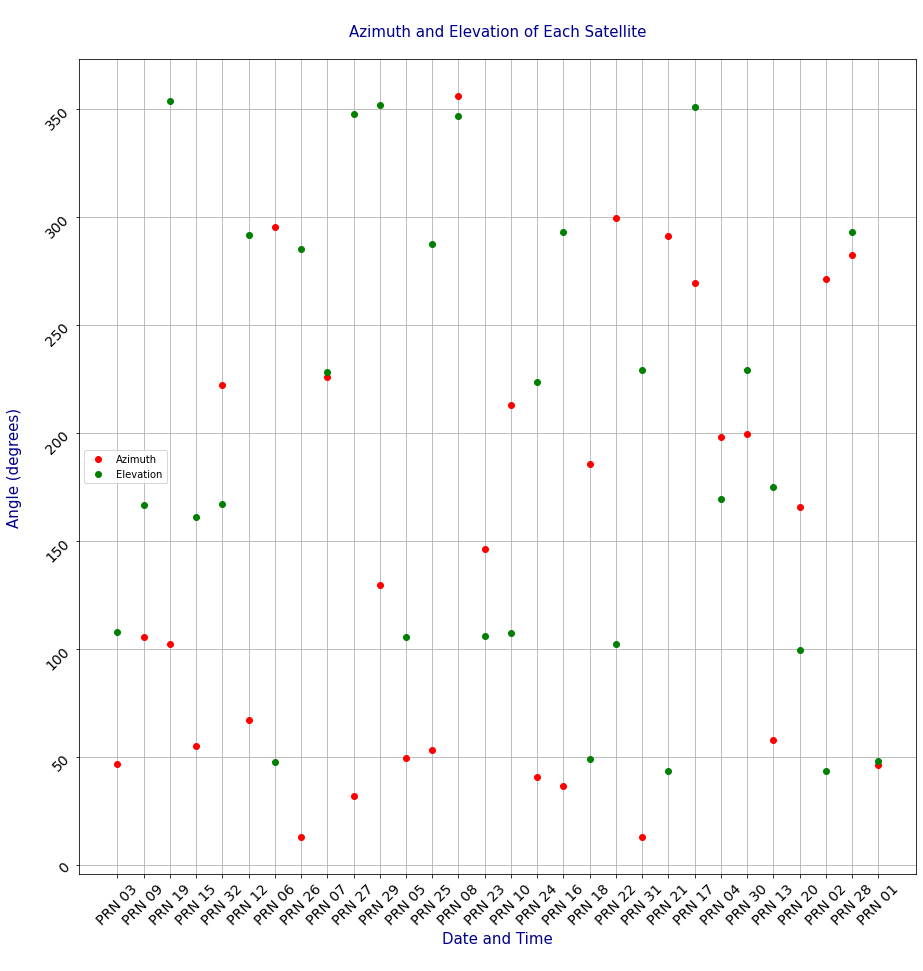

In [8]:
query = sat1.loc[:,:]

title = "\nAzimuth and Elevation of Each Satellite\n"
xLabel = "Date and Time\n"
yLabel = "Angle (degrees)\n"
legend = (['Azimuth', 'Elevation'], 'center left')

plotReset()
plotScatter('PRN', 'ARG_OF_PERICENTER', query, color='Red')
plotScatter('PRN', 'RA_OF_ASC_NODE', query, color='Green')
plotFormats(title, xLabel, yLabel, legend, xTicks = (None,None,None))
plt.show()

107.6802 46.5899 PRN 03
166.6784 105.289 PRN 09
353.5956 102.0513 PRN 19
161.1233 54.7692 PRN 15
167.1729 222.1814 PRN 32
291.6618 66.8796 PRN 12
47.621 295.1683 PRN 06
285.2312 13.0244 PRN 26
228.0875 225.7628 PRN 07
347.5417 31.5852 PRN 27
351.6807 129.645 PRN 29
105.5629 49.2565 PRN 05
287.5187 53.0315 PRN 25
346.6038 355.8437 PRN 08
106.109 146.0705 PRN 23
107.419 212.8143 PRN 10
223.7009 40.7799 PRN 24
292.7221 36.3344 PRN 16
48.8453 185.422 PRN 18
102.1064 299.4188 PRN 22
229.025 12.6465 PRN 31
43.445 291.2396 PRN 21
350.9631 269.3696 PRN 17
169.457 198.1057 PRN 04
229.1439 199.3413 PRN 30
175.009 57.6323 PRN 13
99.4209 165.3767 PRN 20
43.3911 271.1481 PRN 02
292.9099 282.365 PRN 28
48.0595 45.994 PRN 01


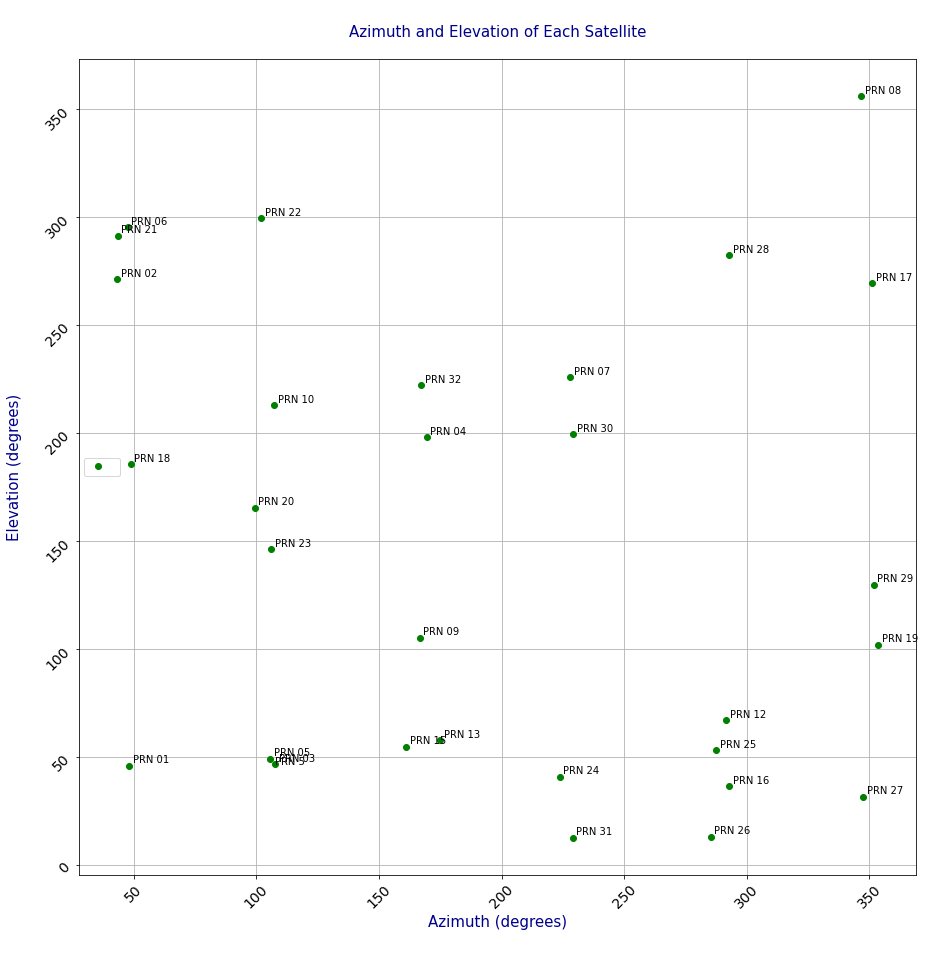

In [13]:
query = sat1.loc[:,:]

title = "\nAzimuth and Elevation of Each Satellite\n"
xLabel = "Azimuth (degrees)\n"
yLabel = "Elevation (degrees)\n"
legend = (['', ''], 'center left')

plotReset()
plotScatter('RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', query, color='Green')
plotFormats(title, xLabel, yLabel, legend, xTicks = (None,None,None))
plt.text(107.6802, 46.5899, 'PRN 5', horizontalalignment='left')
for i in sat1.index: 
    print(sat1['RA_OF_ASC_NODE'][i], sat1['ARG_OF_PERICENTER'][i], sat1['PRN'][i]) 
    plt.text(sat1['RA_OF_ASC_NODE'][i]+1.5, 
             sat1['ARG_OF_PERICENTER'][i]+1.5, 
             sat1['PRN'][i], 
             horizontalalignment='left')
plt.show()